In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
from data_processing import *
from simulation import *
from plotting import *
from end_to_end import *

# SIR Model on G(n,p) Network

Code adapted from first example found here: https://arxiv.org/pdf/2001.02436.pdf.

### Resources
* [Her colleague's paper](https://d1b10bmlvqabco.cloudfront.net/attach/k7v24tpzbybzr/jmca5mxi9t361a/k9ye8o2opt8i/jail_paper.pdf)
* [Daily Bruin Article](https://stack.dailybruin.com/2020/05/12/covid-model/)
* [Epidemics on Networks paper](https://arxiv.org/pdf/2001.02436.pdf)

### Coding Documentation

* https://networkx.github.io/documentation/stable/reference/index.html
* https://epidemicsonnetworks.readthedocs.io/en/latest/

### Assumptions:
- Added inmates are susceptible (not I or R)
- Removed inmates can be any state
- As people die/recover, nodes connected to them do not become connected to other nodes in order to keep avg. degree constant
- Avg. degree of new nodes is correlated with current prison population (aka p is constant)

### Bugs/Wierd Things:
* Dead people get released when inmates are released
* Should removed inmates be from any state?
* Sometimes amount of people dead/recovered is a fraction. I.e. when there should be 1 person recovered, it says 0.99 people recovered, 0.01 people dead


## TODO:
* Fix dead people bug
* get statistics at end about total # infected, dead, recovered
* Think about social distancing effects of release and make sure it is implemented correctly
* **IDEA**: Maybe new inmates should be from any S, I, or R? Instead of always S?

## Set Parameters

In [18]:
# Set G(n,p) model-specific parameters
N = 5000 # number of individuals
p = 0.02 # probability an edge is formed between any node and any other

# Set simulation-specific parameters
birth_number = 100 # number of new inmates at each time step

release_number = 1000 # number of inmates released at times after next condition
release_time = 2

death_rate = 0.0 # percent of recovered that die
rho = 0.01 # percent of initial nodes that are infected

tau = 0.05 # transmission rate
gamma = 0.0 # recovery rate
max_time = 10 # how many time steps to run simulation

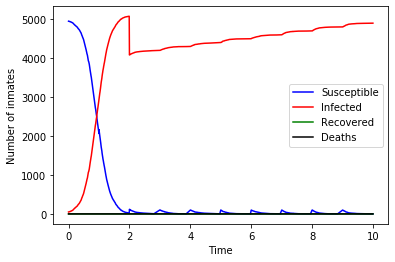

In [19]:
t, S, I, R, D = end_to_end(birth_number, release_number, release_time, death_rate, rho, tau, gamma,
           max_time, N, p)

In [20]:
I[0]

50

# Generate graph

In [5]:
G = nx.fast_gnp_random_graph(N, p)

# Run Simulation

In [9]:
data_list = simulation(G, tau, gamma, rho, max_time, release_time, release_number, birth_number, p)

# Process Data

In [10]:
t, S, I, R, D = process_data(data_list, death_rate=death_rate)

In [11]:
t.shape, I.shape, R.shape, D.shape

((4951,), (4951,), (4951,), (4951,))

# Analyze Results

## Plot results

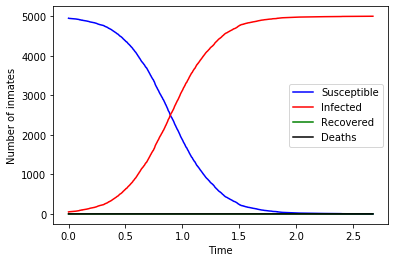

In [12]:
plot(t, S, I, R, D)

In [13]:
I[0]

50

## Analyze statistics

In [ ]:
S+I+R+D == N

## Code to test case without using our custom code

In [ ]:
Gtest = nx.fast_gnp_random_graph(5000, p)

In [ ]:
tTest, Stest, Itest, Rtest = EoN.fast_SIR(Gtest, 0.025, gamma, rho=rho)

In [ ]:
plt.plot(tTest, Itest, label = 'Infected', color='y')
plt.plot(tTest, Rtest, label = 'Recovered', color='g')
plt.plot(tTest, Stest, label = 'Suscepible', color='b')
plt.legend()